In [57]:
# Import library yang dibutuhakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# Load dataset
mush = pd.read_csv('./dataset/mushrooms.csv')

# Inspeksi data
display(mush.head())

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [59]:
# Cek Informasi Data
print(mush.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [60]:
# Convert kategorikal ke nominal

from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
for i in mush:
    mush[i] = labelencoder.fit_transform(mush[i])

mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [61]:
# Karena veil-type valuenya 0 semua, maka kolomnya dihapus : 
mush = mush.drop(["veil-type"],axis=1)
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [62]:
# Membuat training dan testing data

from sklearn.model_selection import train_test_split

# "class" column as numpy array.
y = mush["class"].values
# Semua data kecuali kolom class
x = mush.drop(["class"], axis=1).values
# Split data train and test.
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=44,test_size=0.3)

In [63]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' sebagai kriteria informasi
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)
# Jika pakai gini ga perlu di jelaskan criterion
# Fit dt_entropy kedalam training set
dt_entropy.fit(X_train, y_train)

dt_gini = DecisionTreeClassifier(max_depth=8, random_state=1)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

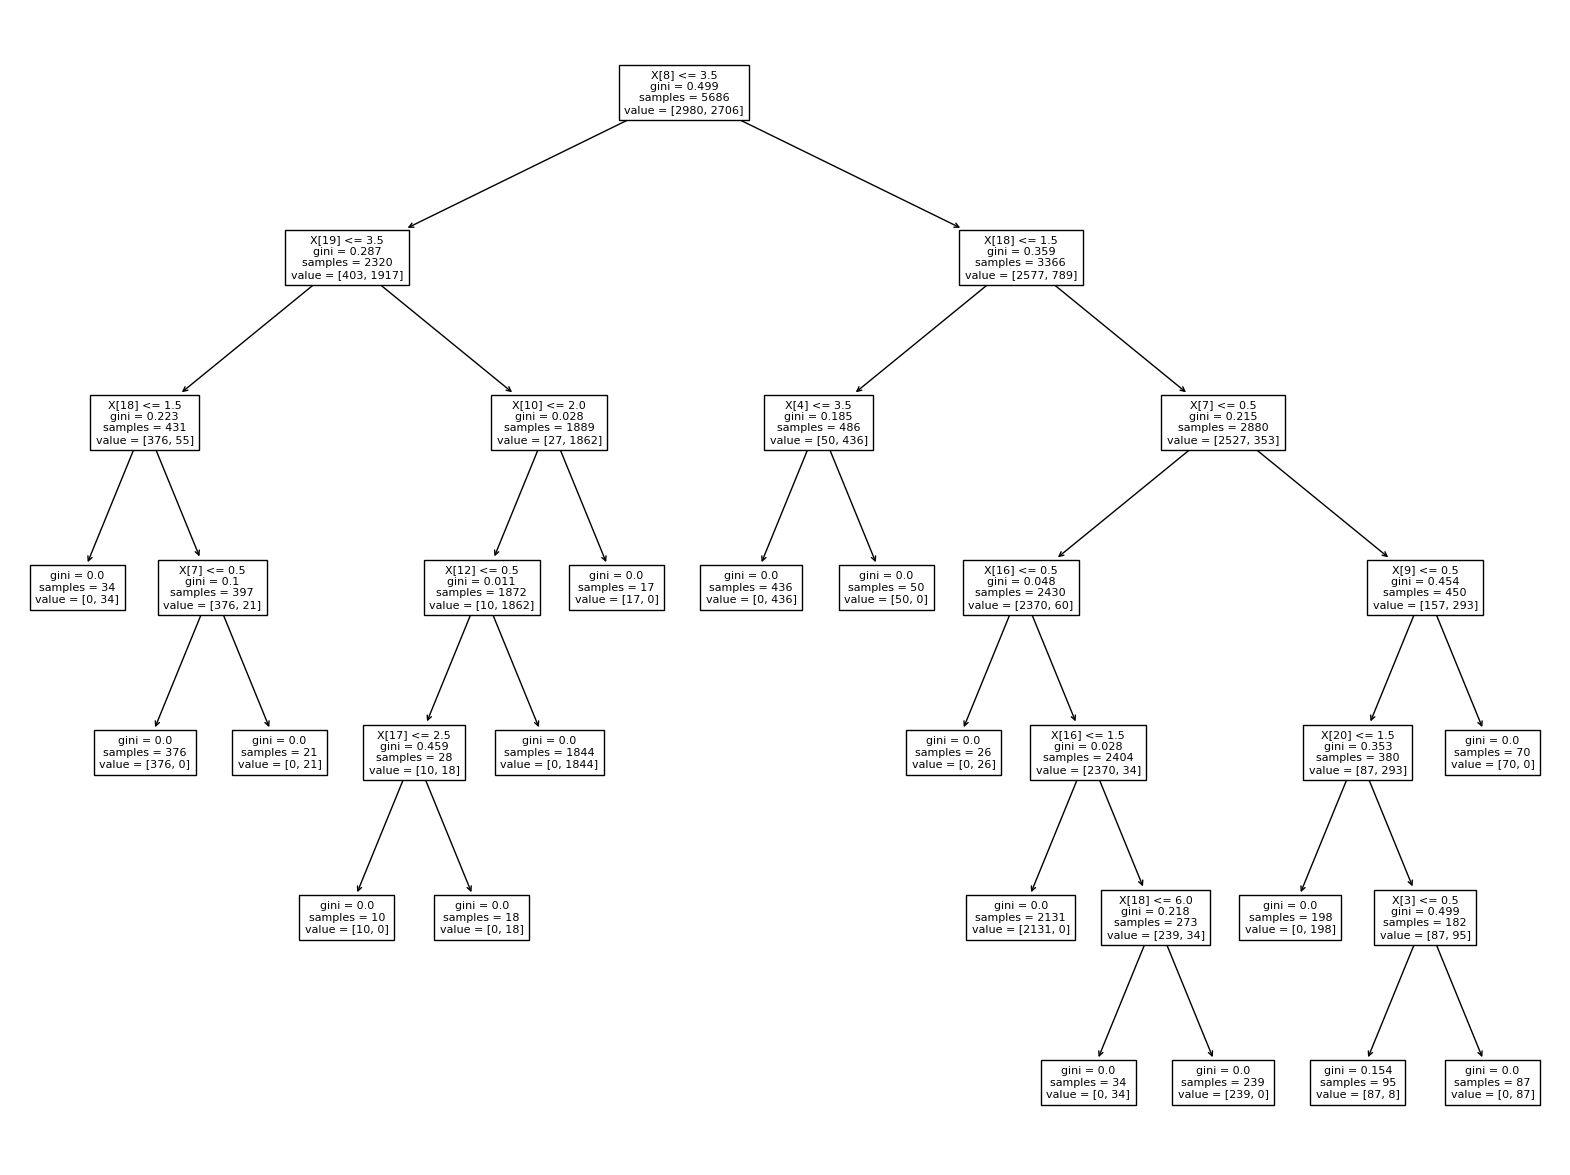

In [64]:
# Visualisasi hasil DT
from sklearn import tree

plt.figure(figsize=(20,15))
tree.plot_tree(dt.fit(X_train, y_train), fontsize=8)
plt.show()

In [65]:
# Memprediksi label set test
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[0 1 1 0 0]


In [66]:
# Kembalikan hasil prediksi ke label asli
def inverse_label(e):
    return 'Poisonous' if e == 1 else 'Edible'

res_label = np.vectorize(inverse_label)
pred_label = res_label(y_pred[0:5])
print(pred_label)

# Anda juga dapat menggunakan cara lain untuk melakukan hal ini
# Pada LabelEncoder() terdapat fungsi untuk melakukan inverse label.

['Edible' 'Poisonous' 'Poisonous' 'Edible' 'Edible']


In [67]:
# EVALUASI CLASSIFICATION TREE
from sklearn.metrics import accuracy_score

# Memprediksi test set labels
y_pred = dt.predict(X_test)

#  menghitung set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 1.00


In [70]:
from sklearn.metrics import accuracy_score

# menggunakan dt_entropy untuk memprediksi test set labels
y_pred_entropy = dt_entropy.predict(X_test)
y_pred_gini = dt_gini.predict(X_test)

# mengevaluasi accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

# Print accuracy_entropy
print("Accuracy achieved by using entropy : ", accuracy_entropy)

# Print accuracy_gini
print("Accuracy achieved by using gini    : ", accuracy_gini)

Accuracy achieved by using entropy :  1.0
Accuracy achieved by using gini    :  1.0
